In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# df_summaries = pd.read_csv("data/articles_summary_cleaned.csv", parse_dates=["date"])
# df_summaries

In [3]:
# df_articles = pd.read_csv("data/all_africa_southsudan.csv")
# df_articles

In [4]:
# print(df_articles.date.unique().shape)

In [5]:
df_tabular = pd.read_csv("data/food_crises_interpol")

In [6]:
df_tabular = df_tabular.set_index('year_month')
df_tabular.index = pd.to_datetime(df_tabular.index)
df_tabular['timestamp']=df_tabular.index

In [7]:
df_tabular.columns

Index(['Unnamed: 0', 'district', 'county', 'region', 'ipc', 'ndvi_mean',
       'ndvi_anom', 'rain_mean', 'rain_anom', 'et_mean', 'et_anom',
       'count_violence', 'sum_fatalities', 'food_price_idx', 'area',
       'cropland_pct', 'pop', 'ruggedness_mean', 'pasture_pct', 'prev_ipc',
       '2prev_ipc', 'next_ipc', 'timestamp'],
      dtype='object')

In [8]:
df_model = df_tabular[['district', 'ipc', 'ndvi_mean', 'ndvi_anom', 'rain_mean',
       'rain_anom', 'et_mean', 'et_anom', 'count_violence', 'sum_fatalities',
       'food_price_idx', 'area', 'cropland_pct', 'pop', 'ruggedness_mean',
       'pasture_pct', 'timestamp']]

In [9]:
train = df_model.loc[df_model.index < '2019-03-01']
# val = df_model.loc[(df_model.index >= '2019-03-01') & (df_model.index < '2019-09-01')]
test = df_model.loc[df_model.index >= '2019-03-01']

In [10]:
test.timestamp

year_month
2019-03-01   2019-03-01
2019-04-01   2019-04-01
2019-05-01   2019-05-01
2019-06-01   2019-06-01
2019-07-01   2019-07-01
                ...    
2019-09-01   2019-09-01
2019-10-01   2019-10-01
2019-11-01   2019-11-01
2019-12-01   2019-12-01
2020-01-01   2020-01-01
Name: timestamp, Length: 847, dtype: datetime64[ns]

In [11]:
train.index

DatetimeIndex(['2009-11-01', '2009-12-01', '2010-01-01', '2010-02-01',
               '2010-03-01', '2010-04-01', '2010-05-01', '2010-06-01',
               '2010-07-01', '2010-08-01',
               ...
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01'],
              dtype='datetime64[ns]', name='year_month', length=8624, freq=None)

In [12]:
test.index

DatetimeIndex(['2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01',
               '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01',
               '2019-11-01', '2019-12-01',
               ...
               '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
               '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
               '2019-12-01', '2020-01-01'],
              dtype='datetime64[ns]', name='year_month', length=847, freq=None)

# DeepAR

In [13]:
# pip install gluonts

In [14]:
from gluonts.dataset.pandas import PandasDataset

train_ds = PandasDataset.from_long_dataframe(train, target='ipc', item_id='district', 
                                       timestamp='timestamp', freq='M')

C:\Users\Goshko\anaconda3\envs\dc3\lib\site-packages\gluonts\json.py:101: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


In [15]:
# pip install torch

In [16]:
# pip install pytorch_lightning

In [17]:
train_ds

PandasDataset<size=77, freq=M, num_feat_dynamic_real=0, num_past_feat_dynamic_real=0, num_feat_static_real=0, num_feat_static_cat=0, static_cardinalities=[]>

In [18]:
from gluonts.torch.model.deepar import DeepAREstimator

estimator = DeepAREstimator(freq='M', prediction_length=6, num_layers=3, lr=0.002, context_length=12,
                            trainer_kwargs={'max_epochs':4})

predictor = estimator.train(train_ds, num_workers=4)

C:\Users\Goshko\anaconda3\envs\dc3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
C:\Users\Goshko\anaconda3\envs\dc3\lib\site-packages\pytorch_lightning\trainer\connectors\logger_connector\logger_connector.py:67: UserWarning: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
  warning_cache.warn(
C:\Users\Goshko\anacond

Epoch 0: : 50it [00:03, 14.90it/s, v_num=3, train_loss=1.220]

Epoch 0, global step 50: 'train_loss' reached 1.21631 (best 1.21631), saving model to 'C:\\Users\\Goshko\\Desktop\\DC3\\JBG060-DC3-23-24-Group24\\lightning_logs\\version_3\\checkpoints\\epoch=0-step=50.ckpt' as top 1


Epoch 1: : 50it [00:03, 15.01it/s, v_num=3, train_loss=0.627]

Epoch 1, global step 100: 'train_loss' reached 0.62684 (best 0.62684), saving model to 'C:\\Users\\Goshko\\Desktop\\DC3\\JBG060-DC3-23-24-Group24\\lightning_logs\\version_3\\checkpoints\\epoch=1-step=100.ckpt' as top 1


Epoch 2: : 50it [00:03, 15.67it/s, v_num=3, train_loss=0.583]

Epoch 2, global step 150: 'train_loss' reached 0.58345 (best 0.58345), saving model to 'C:\\Users\\Goshko\\Desktop\\DC3\\JBG060-DC3-23-24-Group24\\lightning_logs\\version_3\\checkpoints\\epoch=2-step=150.ckpt' as top 1


Epoch 3: : 50it [00:02, 16.84it/s, v_num=3, train_loss=0.544]

Epoch 3, global step 200: 'train_loss' reached 0.54440 (best 0.54440), saving model to 'C:\\Users\\Goshko\\Desktop\\DC3\\JBG060-DC3-23-24-Group24\\lightning_logs\\version_3\\checkpoints\\epoch=3-step=200.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=4` reached.


Epoch 3: : 50it [00:03, 16.57it/s, v_num=3, train_loss=0.544]


In [19]:
pred = list(predictor.predict(train_ds))
all_preds = list()

for district in pred:
    district_name = district.item_id
    p = district.samples.mean(axis=0)
    # make 80% confidence interval
    p10 = np.percentile(district.samples, 10, axis=0)
    p90 = np.percentile(district.samples, 90, axis=0)
    dates = pd.date_range(start=district.start_date.to_timestamp(), periods=len(p), freq='M')
    dates2 = []
    for month in dates:
        day_num = month.strftime("%d")
        month_reset = month - timedelta(days=int(day_num) - 1)
        dates2.append(month_reset)
    district_pred = pd.DataFrame({'timestamp': dates2, 'district': district_name, 'pred': p, 'p10': p10, 'p90': p90})
    all_preds += [district_pred]

all_preds = pd.concat(all_preds, ignore_index=True)

# all_preds['date'] = all_preds.timestamp
# all_preds = all_preds.set_index('date')
# all_preds.index = pd.to_datetime(all_preds.index)
# all_preds.timestamp=all_preds.index

all_preds = all_preds.merge(test, on=['timestamp', 'district'], how='left')

In [20]:
all_preds[['timestamp', 'district', 'ipc', 'pred', 'p10', 'p90']]

,timestamp,district,ipc,pred,p10,p90
0,2019-03-01,Abiemnhom,3.0,3.035629,2.157555,4.140216
1,2019-04-01,Abiemnhom,3.0,2.947505,2.248245,3.666687
2,2019-05-01,Abiemnhom,3.0,2.916966,2.221026,3.715499
3,2019-06-01,Abiemnhom,3.0,2.877861,2.160744,3.630255
4,2019-07-01,Abiemnhom,3.0,2.964727,2.507928,3.497926
...,...,...,...,...,...,...
457,2019-04-01,Yirol West,3.0,3.345356,2.535999,4.112321
458,2019-05-01,Yirol West,3.0,3.346287,2.614550,4.012627
459,2019-06-01,Yirol West,4.0,3.435776,2.857318,4.171199
460,2019-07-01,Yirol West,3.0,3.072711,2.201105,3.794645


In [21]:
def reg_evaluation(y_test, y_pred, district: str):    
    print(f'Results for {district}:')
    print('Mean Absolute Error:', round(mean_absolute_error(y_test, y_pred),2))
    print('Root Mean Squared Error:', round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
    print('Weighted mean absolute percentage error:', 
          round(np.abs(y_test - y_pred).sum() / np.abs(y_test).sum(),2))
    print('\n')

# do clf eval after the rounding!!!

In [22]:
reg_evaluation(all_preds['ipc'], all_preds['pred'], 'all districts')

Results for all districts:
Mean Absolute Error: 0.22
Root Mean Squared Error: 0.35
Weighted mean absolute percentage error: 0.07




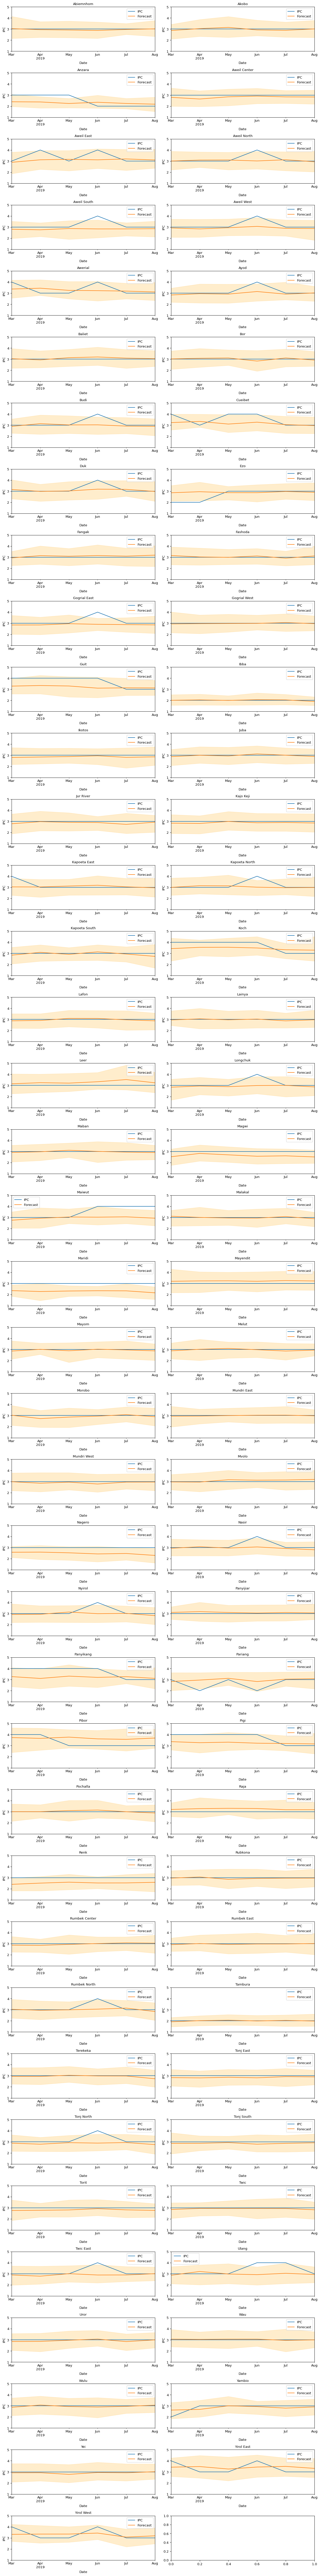

In [23]:
fig, ax = plt.subplots(39,2, figsize=(1280/96, 1280/12), dpi=96)
ax = ax.flatten()

for ax_, ward in enumerate(all_preds['district'].unique()):
    p_ = all_preds.loc[all_preds['district'] == ward]
    p_.plot(x='timestamp', y='ipc', ax=ax[ax_], label='IPC')
    p_.plot(x='timestamp', y='pred', ax=ax[ax_], label='Forecast')
    ax[ax_].fill_between(p_['timestamp'].values, p_['p10'], p_['p90'], alpha=0.2, color='orange')
    ax[ax_].set_title(ward, fontsize=10)
    ax[ax_].legend(fontsize=10)
    ax[ax_].set_xlabel('Date', fontsize=10)
    ax[ax_].set_ylabel('IPC', fontsize=10)
    ax[ax_].tick_params(axis='both', which='major', labelsize=10)
    ax[ax_].tick_params(axis='both', which='minor', labelsize=10)
    ax[ax_].set_ylim(1,5)
    
fig.tight_layout()